Saving games (1).csv to games (1) (7).csv


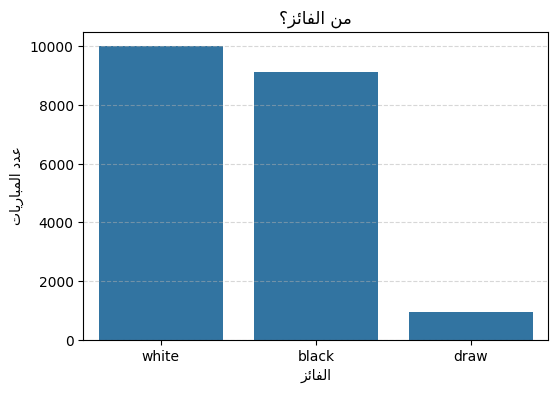

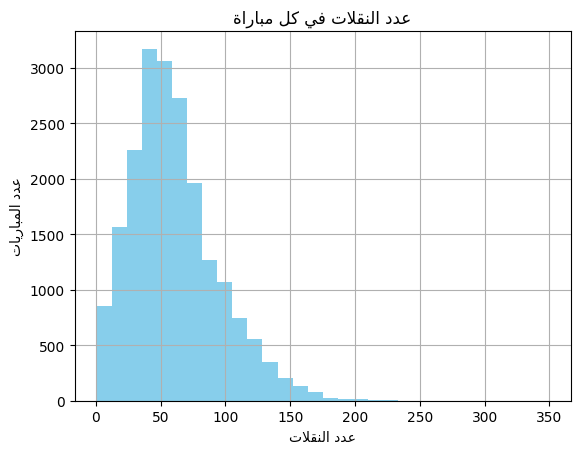

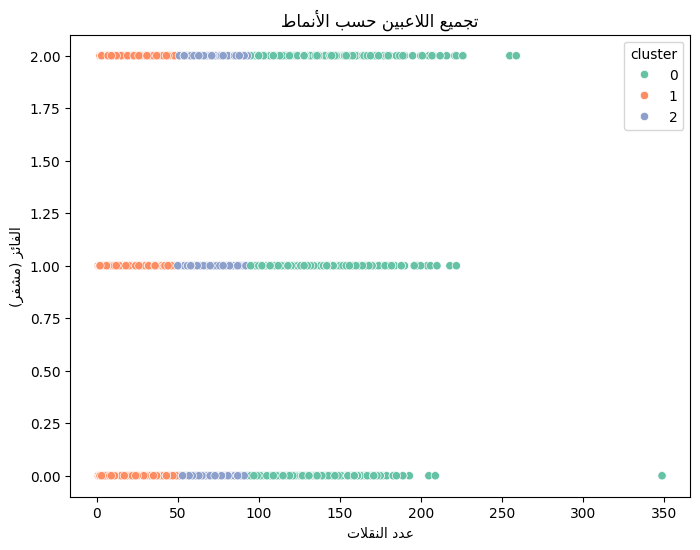

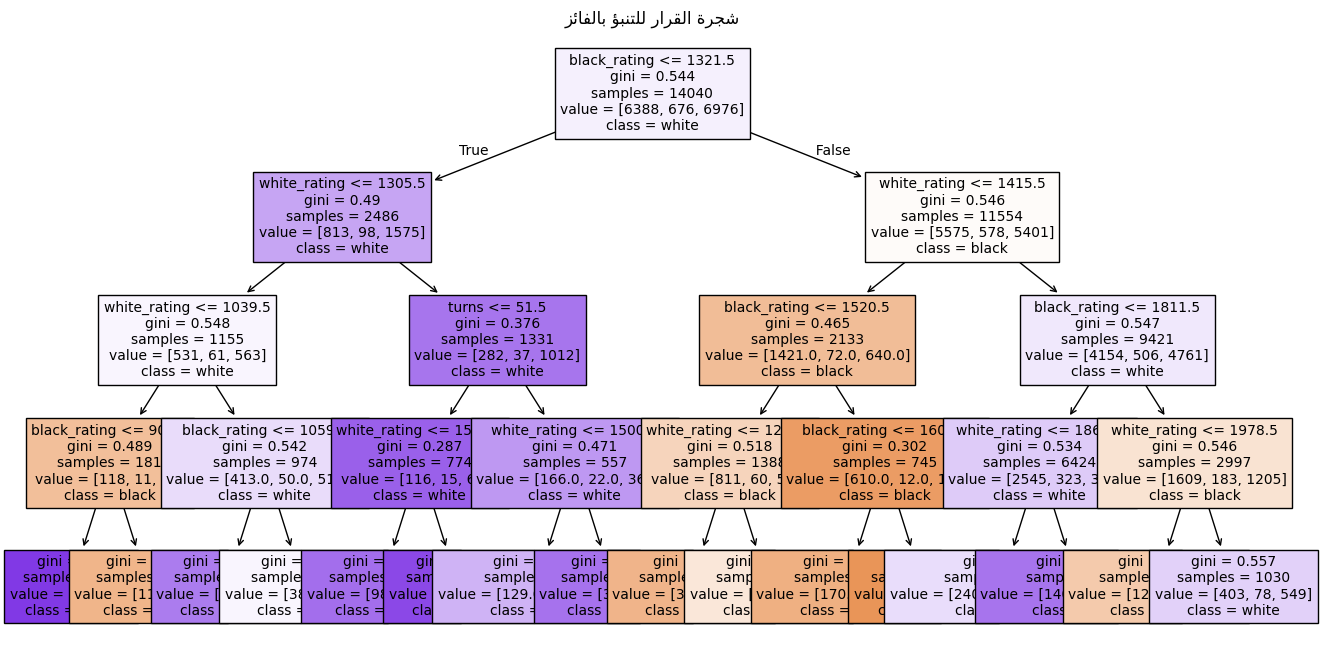

<ipython-input-9-3479a83fa030>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(labels), y=list(values), palette='viridis')


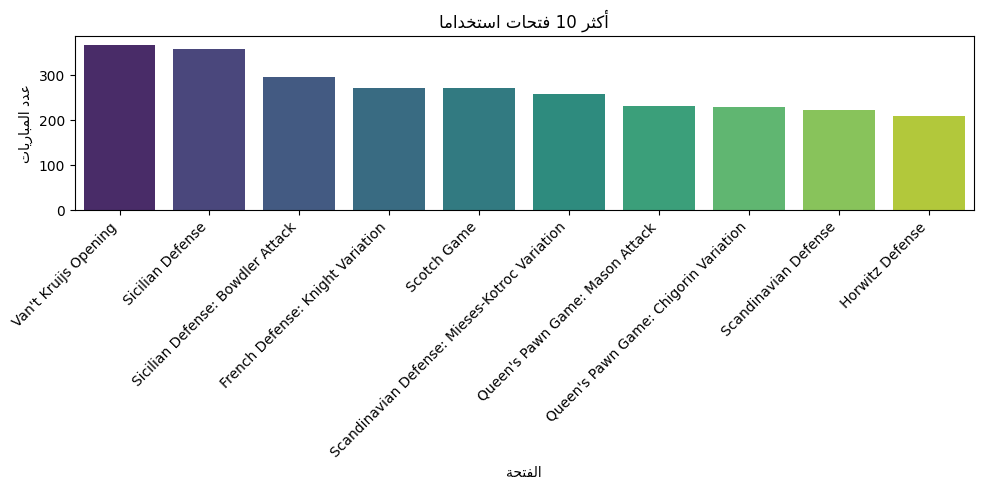


📌 توصيات تصميم تلقائية:
1. الفتحات التي يفوز فيها الأسود أكثر من اللازم (قد تكون صعبة على الأبيض):
 - Van't Kruijs Opening
 - Sicilian Defense
 - Sicilian Defense: Bowdler Attack
2. متوسط عدد النقلات طويل (> 60)، يمكنك التفكير في اختصار وقت اللعب أو تقديم مساعدة.


In [ ]:
# تثبيت مكتبات دعم اللغة العربية
!pip install -q arabic_reshaper python-bidi

# رفع ملف CSV
from google.colab import files
uploaded = files.upload()

# إعداد matplotlib لاستخدام خطوط عربية ومعالجة النصوص
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'  # Use fallback font instead of Arial

import matplotlib.pyplot as plt

import arabic_reshaper
from bidi.algorithm import get_display

# استيراد بقية المكتبات
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import io

# قراءة الملف
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# دالة لعرض النص العربي بشكل سليم
def ar(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# مثال أول: من الفائز؟
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='winner')
plt.title(ar('من الفائز؟'))
plt.xlabel(ar('الفائز'))
plt.ylabel(ar('عدد المباريات'))
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# عدد النقلات
df['turns'].hist(bins=30, color='skyblue')
plt.title(ar("عدد النقلات في كل مباراة"))
plt.xlabel(ar("عدد النقلات"))
plt.ylabel(ar("عدد المباريات"))
plt.grid(True)
plt.show()

# K-Means
label_map = {'white': 0, 'black': 1, 'draw': 2}
df['winner_encoded'] = df['winner'].map(label_map)
X_kmeans = df[['turns', 'winner_encoded']].dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_kmeans)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='turns', y='winner_encoded', hue='cluster', palette='Set2')
plt.title(ar("تجميع اللاعبين حسب الأنماط"))
plt.xlabel(ar("عدد النقلات"))
plt.ylabel(ar("الفائز (مشفّر)"))
plt.show()

# Decision Tree
features = ['turns', 'white_rating', 'black_rating']
df = df.dropna(subset=features + ['winner'])

le = LabelEncoder()
df['winner_encoded'] = le.fit_transform(df['winner'])

X = df[features]
y = df['winner_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=features, class_names=le.classes_, filled=True, fontsize=10)
plt.title(ar("شجرة القرار للتنبؤ بالفائز"))
plt.show()

# تحليل الفتحات
top_openings = Counter(df['opening_name']).most_common(10)
labels, values = zip(*top_openings)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(labels), y=list(values), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(ar("أكثر 10 فتحات استخدامًا"))
plt.xlabel(ar("الفتحة"))
plt.ylabel(ar("عدد المباريات"))
plt.tight_layout()
plt.show()

# توصيات تلقائية
difficult_openings = df[df['winner'] == 'black']['opening_name'].value_counts().head(3)
print("\n📌 توصيات تصميم تلقائية:")
print("1. الفتحات التي يفوز فيها الأسود أكثر من اللازم (قد تكون صعبة على الأبيض):")
for op in difficult_openings.index:
    print(f" - {op}")

if df['turns'].mean() > 60:
    print("2. متوسط عدد النقلات طويل (> 60)، يمكنك التفكير في اختصار وقت اللعب أو تقديم مساعدة.")
